<a href="https://colab.research.google.com/github/yunhui666/Kaggle_House_Prediction_MLProject/blob/main/Step5_Modeling_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span id="prepare"></span>
# 1. Prepare Problem


## a) Load libraries


In [ ]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

### Load dataset

In [ ]:
# Load real estate data from CSV
DF = pd.read_csv('data/clean_inputwithfeatures.csv')

In [ ]:
df = DF[DF.SalePrice.isnull() == False]

In [ ]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YrSold,big_house,built_during_recession,sold_during_recession,property_age,property_remodel_age,Alley_Grvl,Alley_Missing,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TownHouse,BsmtCond_Fa,BsmtCond_Gd,...,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,RoofMatl_CompShg,RoofMatl_Other,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_Missing,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,208500.0,0,8,856.0,0,2008,0,0,0,5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500.0,0,6,1262.0,298,2007,0,0,0,31,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,223500.0,0,6,920.0,0,2008,0,0,0,7,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,1,1,642.0,3.0,1998.0,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,140000.0,0,7,756.0,0,2006,0,0,0,91,55,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,250000.0,0,9,1145.0,192,2008,0,0,0,8,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


### 1. Linear Regression

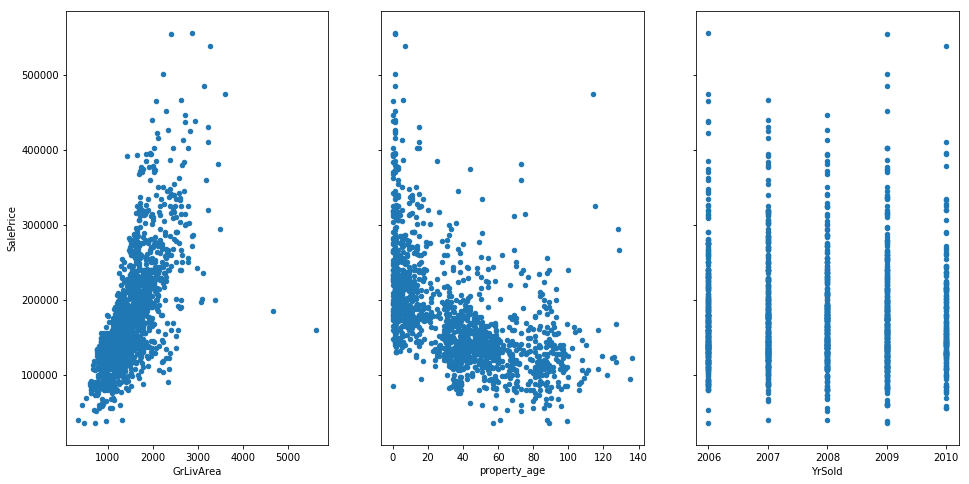

In [ ]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='GrLivArea', y='SalePrice', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='property_age', y='SalePrice', ax=axs[1])
df.plot(kind='scatter', x='YrSold', y='SalePrice', ax=axs[2])

In [ ]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='SalePrice ~ GrLivArea', data=df).fit()

# print the coefficients
lm.params

Intercept    27982.224535
GrLivArea      100.279739
dtype: float64

### Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

In [ ]:
# create a DataFrame with the minimum and maximum values of GrLivArea
X_new = pd.DataFrame({'GrLivArea': [df.GrLivArea.min(), df.GrLivArea.max()]})
X_new.head()

,GrLivArea
0,334
1,5642


In [ ]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     61475.657365
1    593760.512048
dtype: float64

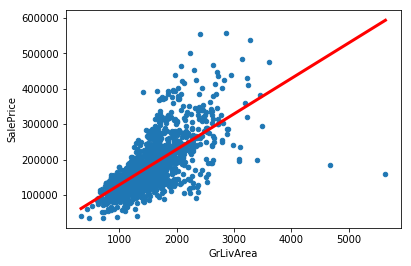

In [ ]:
# first, plot the observed data
df.plot(kind='scatter', x='GrLivArea', y='SalePrice')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=3)

In [ ]:
# print the R-squared value for the model
lm.rsquared

0.4760925070590861

### Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient

### Can be Used for feature engineering (selection)

In [ ]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='SalePrice ~ GrLivArea + property_age + OverallQual + YrSold', data=df).fit()

# print the coefficients
lm.params

Intercept      -888345.469493
GrLivArea           55.618164
property_age      -498.927498
OverallQual      24966.945577
YrSold             423.348952
dtype: float64

In [ ]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1043.
Date:                Sat, 18 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:11:02   Log-Likelihood:                -17396.
No. Observations:                1455   AIC:                         3.480e+04
Df Residuals:                    1450   BIC:                         3.483e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8.883e+05    1.5e+06     -0.592      0.554   -3.83e+06    2.06e+06
GrLivArea       55.6182      2.437     22.823      0.000      50.838      60.398
property_age  -498.9275     40.843    -12.216      0.000    -579.045    -418.810
OverallQual   2.497e+04   1086.301     22.983      0.000    2.28e+04    2.71e+04
YrSold         423.3490    747.435      0.566      0.571   -1042.821    1889.519
==============================================================================
Omnibus:                      284.198   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7720.305
Skew:                           0.056   Prob(JB):                         0.00
Kurtosis:                      14.284   Cond. No.                     3.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple Linear Regression in scikit-learn

In [ ]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

# create X and y
feature_cols = ['GrLivArea','property_age','YrSold','OverallQual']
X = df[feature_cols]
y = df.SalePrice

#fit the model
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# Print intercept and coefficient
print( lm.intercept_ )
print( lm.coef_ )

-888345.4694930012
[   55.61816429  -498.92749845   423.34895208 24966.94557685]


In [ ]:
# check that the coeffients are the expected ones.
m = lm.coef_[0]
m2 = lm.coef_[1]
m3 = lm.coef_[2]
m4 = lm.coef_[3]

b = lm.intercept_
print(' y = {1} + ( x1 * {0} ) + ( x2 * {2} ) + ( x3 * {3} ) + ( x4 * {4} )'.format(m, b, m2, m3, m4))

 y = -888345.4694930012 + ( x1 * 55.618164288436475 ) + ( x2 * -498.927498450231 ) + ( x3 * 423.3489520791834 ) + ( x4 * 24966.945576853603 )


### Unsupervised Learning : K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
X = (df[['GrLivArea','property_age']] - df[['GrLivArea','property_age']].mean())/df[['GrLivArea','property_age']].std()


/Users/jiangyunzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [ ]:
X = X.as_matrix()

/Users/jiangyunzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [ ]:
X.shape

(1455, 2)

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=1234
)
y_km = km.fit_predict(X)

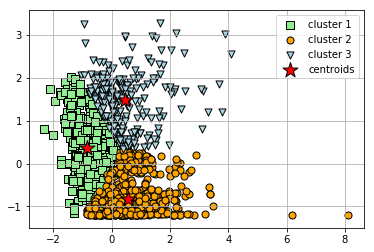

In [ ]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()